In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.shape

(1599, 12)

In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:>

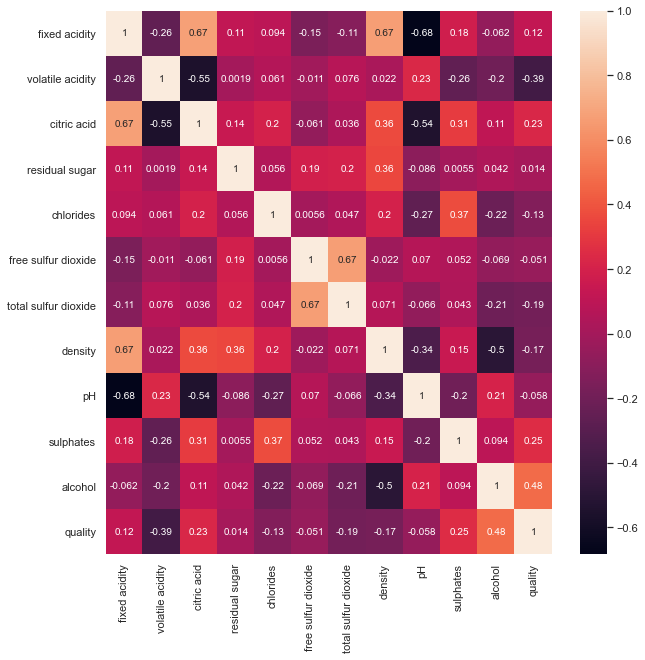

In [7]:
fig = plt.subplots(figsize=(10, 10))
sns.heatmap(wine.corr(), annot=True)

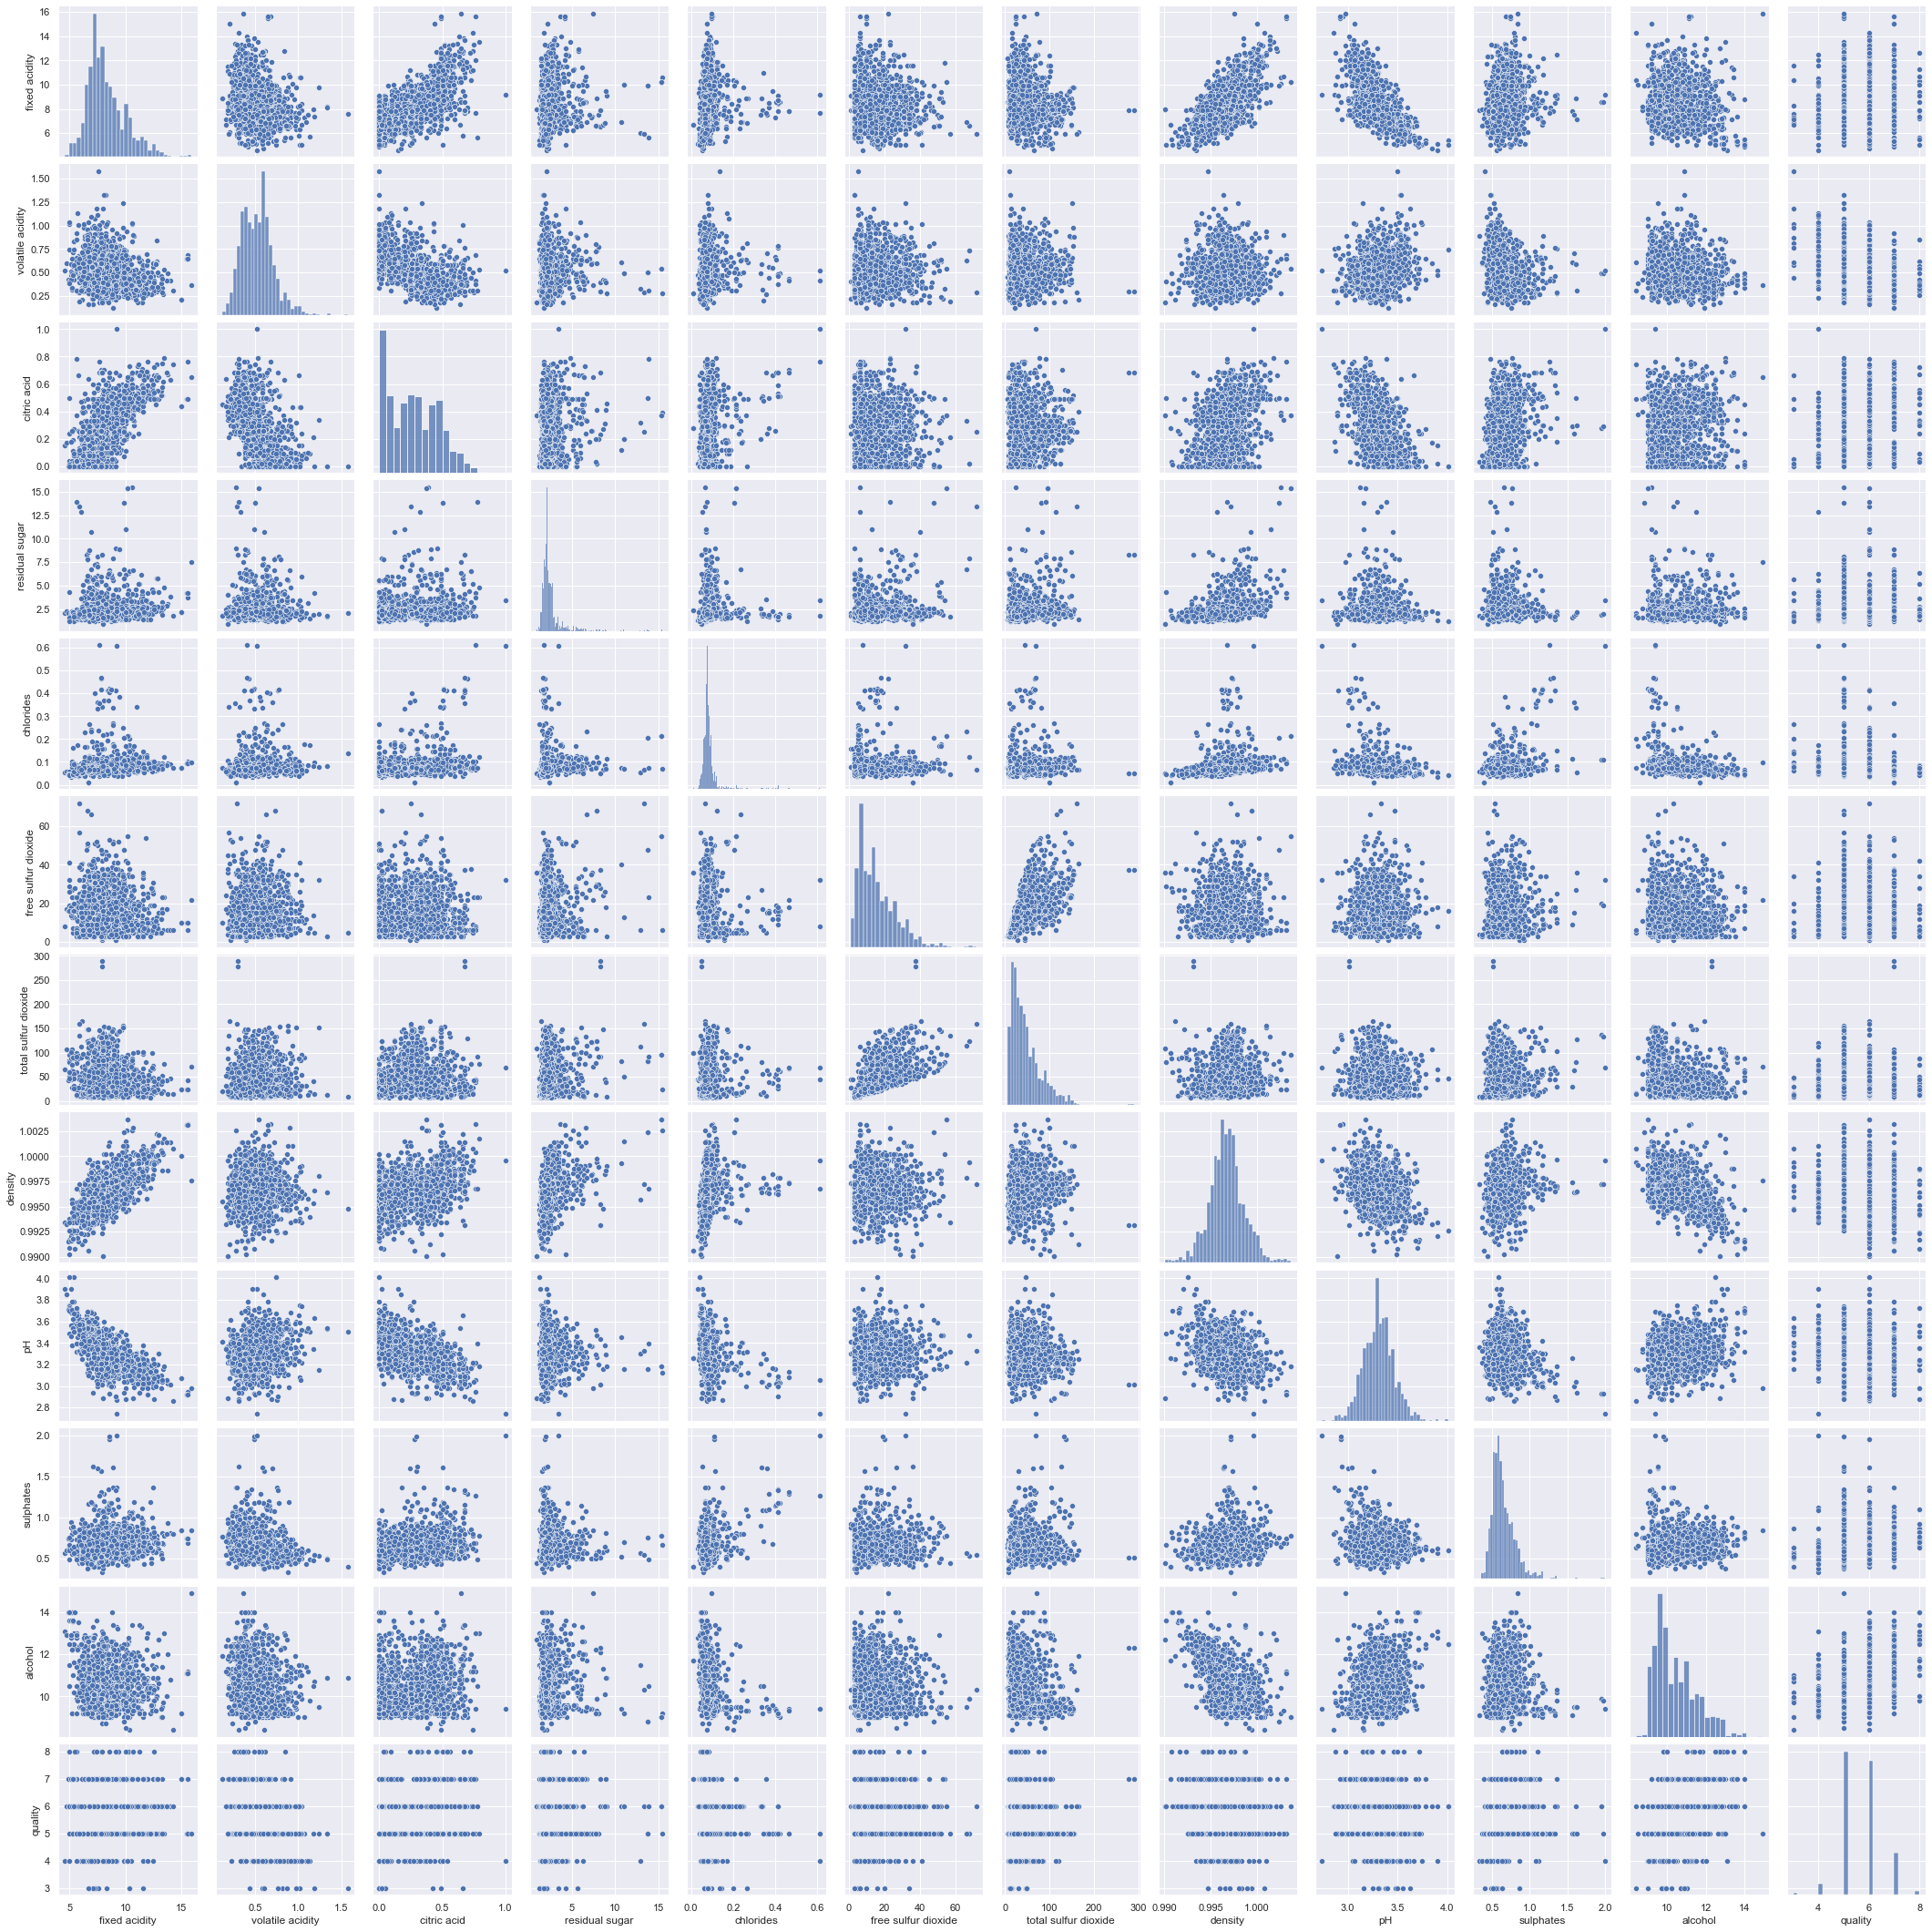

In [8]:
sns.pairplot(data=wine)

In [9]:
bins  = (2, 6.5, 8)
group_names = ['Worst', 'Best']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wine['quality']= le.fit_transform(wine['quality'])

In [11]:
wine.quality.value_counts()

1    1382
0     217
Name: quality, dtype: int64

In [12]:
X = wine.loc[:, ['', 10]].values
Y = wine['quality'].values

KeyError: "None of [Index(['', 10], dtype='object')] are in the [columns]"

In [ ]:
sns.countplot(x=wine['quality'])

In [ ]:
wine.head()

## Splitting Dataset & Modelling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.ftransform(X_test)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0, solver='lbfgs')
log.fit(X_train, Y_train)

In [ ]:
pred = log.predict(X_test)


In [ ]:
log.score(X_test, Y_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, pred)
acc

## KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier(n_neighbors = 7)
neighbor.fit(X_train, Y_train)

In [ ]:
pred1 = neighbor.predict(X_test)

In [ ]:
neighbor.score(X_test, Y_test)

In [ ]:
acc1 = accuracy_score(Y_test, pred1)
acc1

## SVM Algorithm

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=0)
svm.fit(X_train, Y_train)

In [ ]:
pred2 = svm.predict(X_test)

In [ ]:
svm.score(X_test, Y_test)

In [ ]:
acc2 = accuracy_score(Y_test, pred2)
acc2

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train, Y_train)

In [ ]:
pred3 = naive.predict(X_test)

In [ ]:
naive.score(X_test, Y_test)

In [ ]:
acc3 = accuracy_score(Y_test, pred3)
acc3

## DecisionTree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision.fit(X_train, Y_train)

In [ ]:
pred4 = decision.predict(X_test)

In [ ]:
decision.score(X_test, Y_test)

In [ ]:
acc4 = accuracy_score(Y_test, pred4)
acc4

In [ ]:
plt.plot(X_test,Y_test)

## RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state=0)
forest.fit(X_train, Y_train)

In [ ]:
pred5 = forest.predict(X_test)

In [ ]:
forest.score(X_test, Y_test)

In [ ]:
acc5 = accuracy_score(Y_test, pred5)
acc5

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, forest.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('white', 'lightgreen'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()